In [2]:
# never pick even number of trees

# Content for this class: (interview hot topic)

 1. What is imbalanced Dataset.
 2. Problem with Imbalanced datasets
 3. Why do we need to study imbalanced dataset?
 4. Solution to handle this scenario.

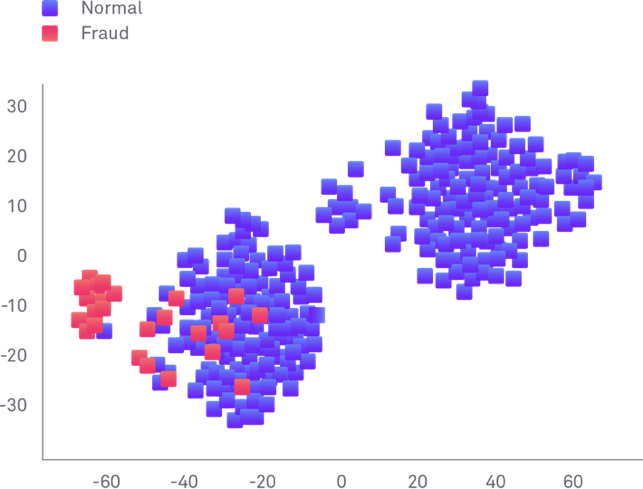

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# create dataframe

df_stu = pd.DataFrame({'stu_name': ['A', 'B', 'C'], 'study_hours':[2,3,4], 'target': ['studious', 'average', 'below_average']})
df_stu

,stu_name,study_hours,target
0,A,2,studious
1,B,3,average
2,C,4,below_average


In [5]:
# create a dataframe with income and age columns

df = pd.DataFrame({
    "income": np.random.randint(20000, 100000, 1000), "age": np.random.choice(70,1000)
})

# create a target column with imbalanced default rates
df['default'] = np.random.choice([0,1], size=1000, p=[0.8, 0.2])

# print the dataframe
print(df)

     income  age  default
0     85146   29        0
1     77225   21        0
2     88802   20        0
3     66336    0        0
4     38994    0        0
..      ...  ...      ...
995   66498   43        0
996   64688   57        0
997   86275   22        0
998   74082   22        0
999   60749    5        0

[1000 rows x 3 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   income   1000 non-null   int64
 1   age      1000 non-null   int64
 2   default  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [7]:
df.describe()

,income,age,default
count,1000.000000,1000.000000,1000.000000
mean,59380.923000,34.905000,0.201000
std,23228.433025,20.441914,0.400949
min,20118.000000,0.000000,0.000000
25%,38712.250000,17.000000,0.000000
50%,58938.000000,35.000000,0.000000
75%,79379.250000,53.000000,0.000000
max,99979.000000,69.000000,1.000000


In [8]:
df.default.value_counts()

,count
default,
0,799
1,201


In [9]:
df.default.value_counts()/df.shape[0]*100 # percentage of how many times 0 and 1 comes

,count
default,
0,79.9
1,20.1


from above report there are 80% people in the data who did not default and almost
20% defaulted. The data seems to be imbalanced.

<Axes: xlabel='income', ylabel='age'>

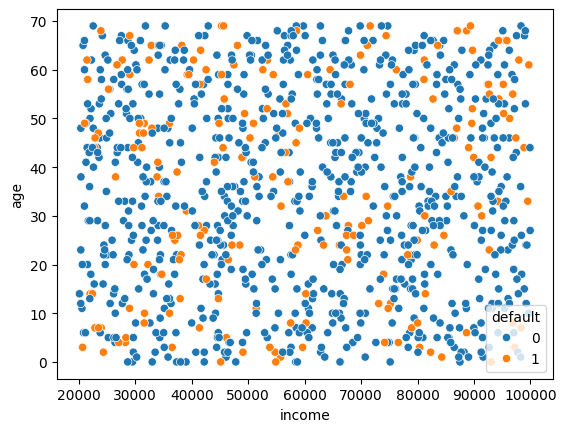

In [10]:
# scatterplot

sns.scatterplot(data = df, x = 'income', y = 'age', hue = 'default')

In [11]:
from numpy import unique
from pandas import read_csv
# load the dataset

credit = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')
credit


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
credit.shape

(284807, 31)

In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
credit = credit[['Time', 'V1', 'V2', 'Amount', 'Class']]
credit

,Time,V1,V2,Amount,Class
0,0.0,-1.359807,-0.072781,149.62,0
1,0.0,1.191857,0.266151,2.69,0
2,1.0,-1.358354,-1.340163,378.66,0
3,1.0,-0.966272,-0.185226,123.50,0
4,2.0,-1.158233,0.877737,69.99,0
...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,0.77,0
284803,172787.0,-0.732789,-0.055080,24.79,0
284804,172788.0,1.919565,-0.301254,67.88,0
284805,172788.0,-0.240440,0.530483,10.00,0


In [15]:
# renaming name for the columns

credit.rename(columns = {'V1': 'Salary', 'V2': 'Loan'}, inplace=True)

<ipython-input-15-1984099a6696>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit.rename(columns = {'V1': 'Salary', 'V2': 'Loan'}, inplace=True)


In [16]:
credit

,Time,Salary,Loan,Amount,Class
0,0.0,-1.359807,-0.072781,149.62,0
1,0.0,1.191857,0.266151,2.69,0
2,1.0,-1.358354,-1.340163,378.66,0
3,1.0,-0.966272,-0.185226,123.50,0
4,2.0,-1.158233,0.877737,69.99,0
...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,0.77,0
284803,172787.0,-0.732789,-0.055080,24.79,0
284804,172788.0,1.919565,-0.301254,67.88,0
284805,172788.0,-0.240440,0.530483,10.00,0


In [17]:
credit.Amount.value_counts()/credit.shape[0]*100

,count
Amount,
1.00,4.806062
1.98,2.122139
0.89,1.710632
9.99,1.666743
15.00,1.151657
...,...
62.09,0.000351
552.05,0.000351
1467.75,0.000351


In [18]:
credit.describe()

,Time,Salary,Loan,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,25691.160000,1.000000


# Working with a real dataset now of German credit

In [19]:

from numpy import unique
from pandas import read_csv
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv'
df = pd.read_csv(url,header = None)

df



,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [20]:
df = df[[1,4,20]]
df.rename(columns = {20:'Target',1:'age',4:'income'}, inplace = True)    # remove inverted commas from 20 as it is int

<ipython-input-20-e1d4873ee5e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {20:'Target',1:'age',4:'income'}, inplace = True)    # remove inverted commas from 20 as it is int


In [21]:
df

,age,income,Target
0,6,1169,1
1,48,5951,2
2,12,2096,1
3,42,7882,1
4,24,4870,2
...,...,...,...
995,12,1736,1
996,30,3857,1
997,12,804,1
998,45,1845,2


In [22]:
df.Target.value_counts()/df.shape[0]*100

,count
Target,
1,70.0
2,30.0


In [23]:
df.describe()

,age,income,Target
count,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,1.300000
std,12.058814,2822.736876,0.458487
min,4.000000,250.000000,1.000000
25%,12.000000,1365.500000,1.000000
50%,18.000000,2319.500000,1.000000
75%,24.000000,3972.250000,2.000000
max,72.000000,18424.000000,2.000000


<Axes: xlabel='age', ylabel='income'>

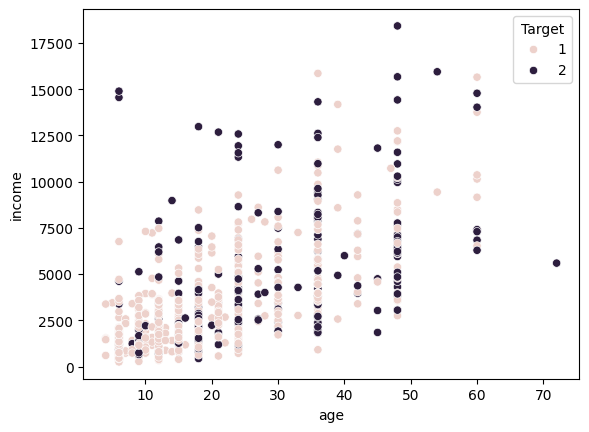

In [24]:
sns.scatterplot(data = df, x = 'age', y = 'income', hue = 'Target')

<Axes: xlabel='Target', ylabel='count'>

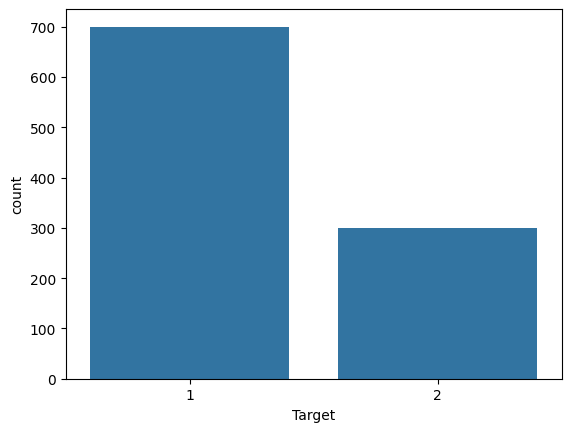

In [25]:
# countplot

sns.countplot(data = df, x = 'Target')

# This problem can occur for multiclass classfications as well

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [27]:
X= df[['age','income']]
Y = df['Target']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [28]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = clf.predict(x_test)

In [30]:
clf.classes_ # to check the classes

array([1, 2])

### confusion matrix

In [31]:
cm = confusion_matrix(y_test,y_pred)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.98      0.82       209
           2       0.64      0.10      0.17        91

    accuracy                           0.71       300
   macro avg       0.68      0.54      0.50       300
weighted avg       0.69      0.71      0.63       300



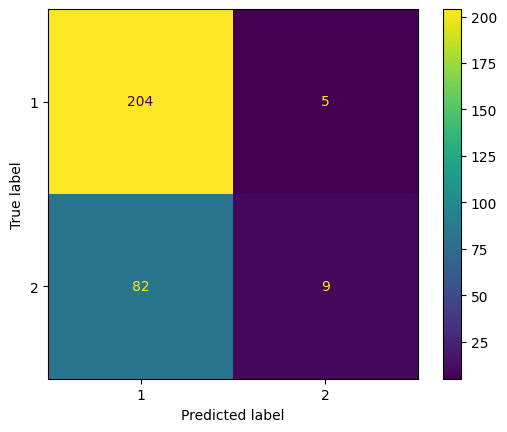

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = clf.classes_)
disp.plot()

In [34]:
accuracy_score(y_test,y_pred)

0.71

In [35]:
precision_score(y_test,y_pred) ## tp/tp+fp. why is this low?? answer = imbalanced data

0.7132867132867133

In [36]:
round(recall_score(y_test,y_pred,pos_label = 2), 2) # tp/tp+fn

0.1

In [37]:
pd.DataFrame(y_pred).value_counts()

,count
0,
1,286
2,14


In [38]:
y_test[y_test == 1]

,Target
737,1
740,1
660,1
411,1
678,1
...,...
464,1
362,1
468,1
428,1


## How to handle imbalanced Data?

#### 1. Undersampling
#### 2. Oversampling
#### 3. Smote -v.important
#### 4. Ensemble methods
#### 5. Cost Sensitive learning

# **1**. **Random** **Undersampling**

it takes random samples from the majority class and makes the new train data "balanced" by ensuring equal no. of all classes consisting of minority and majority classes


Pros:
1. reduced bias
2. faster training because data is reduced as the classes are balanced after sampling and data = 2*minorty_class_count

Cons:
1. Info loss
2. Sampling Bias needs to be checked although with random sampling it is already checked

In [1]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
rus = RandomUnderSampler(random_state=42)

In [40]:
X_resampled,Y_resampled = rus.fit_resample(x_train,y_train)

In [41]:
Y_resampled.value_counts()

,count
Target,
1,209
2,209


In [42]:
y_train.value_counts()

,count
Target,
1,491
2,209


In [43]:
print("x_train's shape :", x_train.shape)
print("x_resampled's shape :" ,X_resampled.shape)

x_train's shape : (700, 2)
x_resampled's shape : (418, 2)


In [44]:
##train algo again
from sklearn.ensemble import RandomForestClassifier
clf_rus = RandomForestClassifier()
# clf_rus = LogisticRegression()
clf_rus.fit(X_resampled,Y_resampled)

RandomForestClassifier()

In [45]:
y_pred_rus = clf_rus.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred_rus))

              precision    recall  f1-score   support

           1       0.69      0.59      0.64       209
           2       0.30      0.40      0.34        91

    accuracy                           0.53       300
   macro avg       0.50      0.49      0.49       300
weighted avg       0.57      0.53      0.55       300



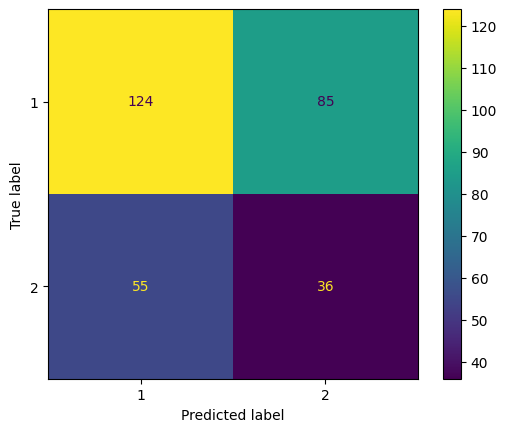

In [47]:
cm_rus = confusion_matrix(y_test,y_pred_rus)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rus,display_labels=clf_rus.classes_)
disp.plot()

# ** 2ND TECHNIQUE - OVERSAMPLING**

Copies of minority class created to increase the data to 2*majority_class_count

pros:
1. reduces partiality towards majority class

cons:
1. duplication of data causes overfitting
2. leads to overfit when used with decision tree

In [48]:
from imblearn.over_sampling import RandomOverSampler

In [49]:
rus_over = RandomOverSampler()

In [50]:
X_res,Y_res = rus_over.fit_resample(x_train,y_train) # fitting fit_resample on original x_train and y_train to get resampled data

In [51]:
print("oversampled_data_shape",X_res.shape)
print("train_data_shape",x_train.shape)

oversampled_data_shape (982, 2)
train_data_shape (700, 2)


In [52]:
print(y_train.value_counts())
print(Y_res.value_counts())

Target
1    491
2    209
Name: count, dtype: int64
Target
1    491
2    491
Name: count, dtype: int64


In [53]:
o_clf = LogisticRegression()
o_clf.fit(X_res,Y_res)

LogisticRegression()

In [54]:
y_pred_o = o_clf.predict(x_test)

In [55]:
print(classification_report(y_test,y_pred_o))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75       209
           2       0.42      0.42      0.42        91

    accuracy                           0.65       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.65      0.65      0.65       300



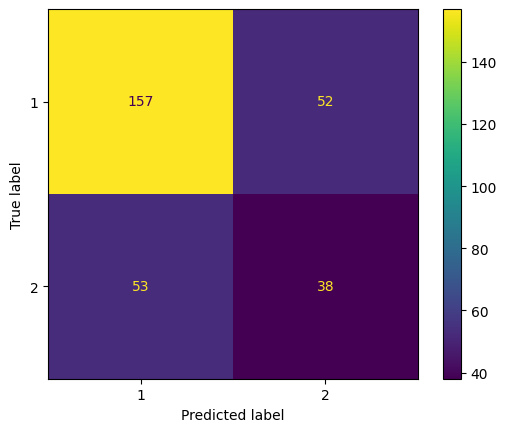

In [56]:
o_cm = confusion_matrix(y_test,y_pred_o)
disp = ConfusionMatrixDisplay(confusion_matrix=o_cm,display_labels = o_clf.classes_)
disp.plot()

Images to show the above 2 techniques

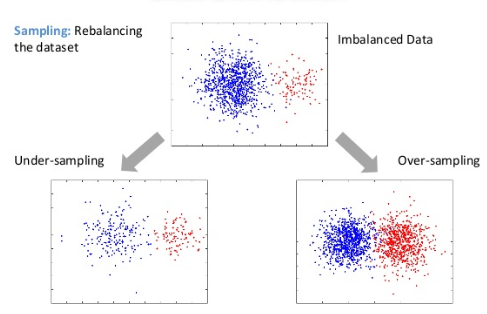

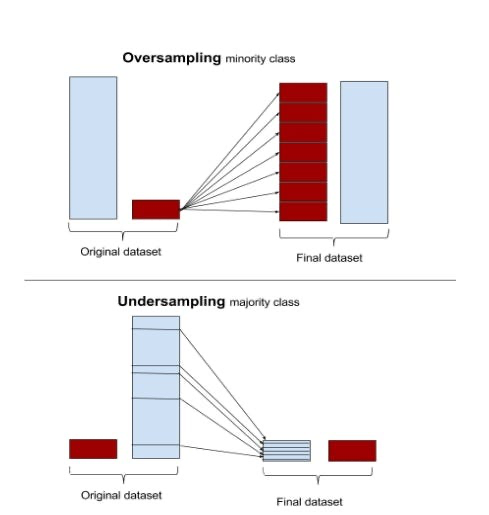

# ***3rd technique - "SMOTE" (synthetic minority oversampling)***
a type of oversampling but above techniques duplicate the existing data whereas SMOTE generates new data point

How does it do it ?
steps:
1. train KNN on minority class observations.find each obsrvation's N closest neighbors . Example - 5 closest
2. creates new synthetic data using a formula ( homework !!)



pros:
1. reduces bias
2. avoids duplication of data

cons:
1. computational complexity
2. sensitive outliers
3. balance achieved may not reflect true nature
4. doent handle categorical data well

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
smote = SMOTE(random_state = 42)

In [59]:
X_sm_res,Y_sm_res = smote.fit_resample(x_train,y_train)

In [60]:
print('oversampled data shape',X_sm_res.shape)
print('x_train data shape', x_train.shape)

oversampled data shape (982, 2)
x_train data shape (700, 2)


In [61]:
print(Y_sm_res.value_counts())
print(y_train.value_counts())

Target
1    491
2    491
Name: count, dtype: int64
Target
1    491
2    209
Name: count, dtype: int64


In [62]:
clf_smote = LogisticRegression()
clf_smote.fit(X_sm_res,Y_sm_res)
y_pred_smote = clf_smote.predict(x_test)

In [63]:
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           1       0.75      0.73      0.74       209
           2       0.41      0.43      0.42        91

    accuracy                           0.64       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.64      0.64      0.64       300



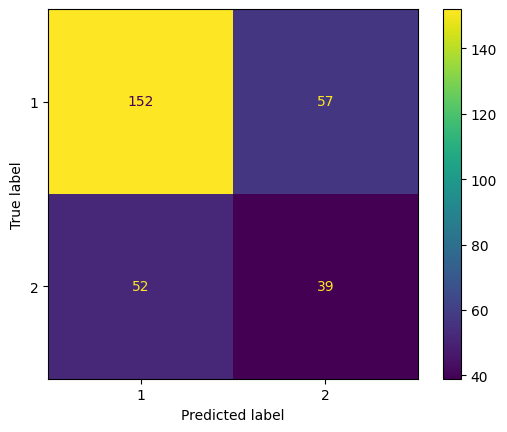

In [64]:
smote_cm = confusion_matrix(y_test,y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=smote_cm,display_labels =clf_smote.classes_)
disp.plot()

# ***4th technique - Ensemble methods***

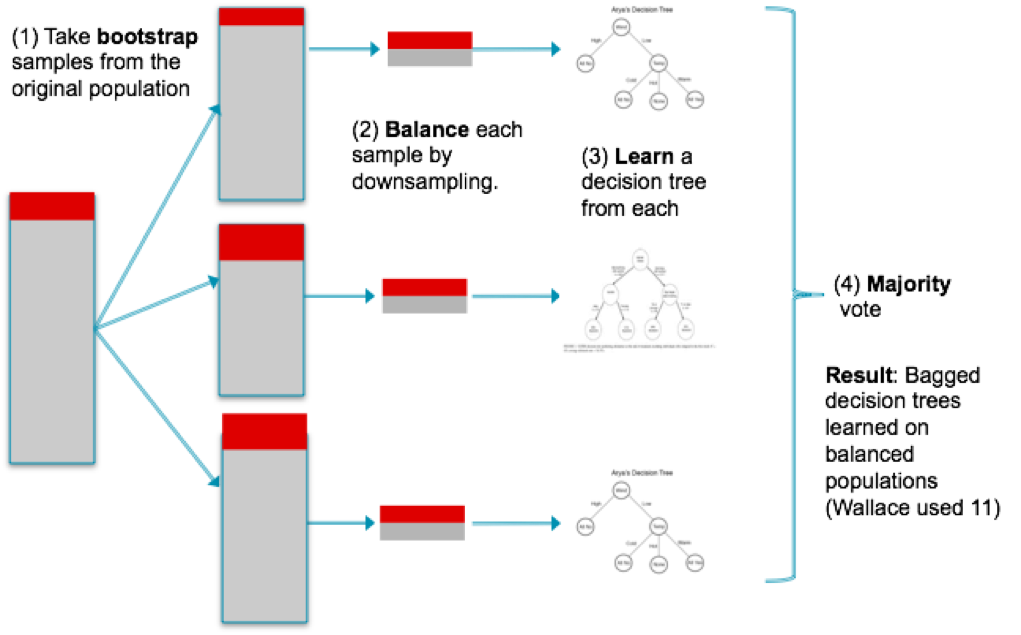

In [65]:
from imblearn.ensemble import BalancedRandomForestClassifier

# ***5th technique - Cost Sensitive Learning ***
chnaging the process of learning  of a ML model so as to achieve balance.This can be done in following ways:

1. class weights :  assigning a lower weight to majority class and higher to minorty class (use "class_weight" parameter in most algos)

you dont need to import from imblearn library but need to use class_weight parameter while creating the model.

<!-- 2.  use a custom loss function -->

In [68]:
# naive bayes - probaility is conditional prbabilityy
## https://scikit-learn.org/1.5/modules/naive_bayes.html